In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import pandas as pd
df = pd.read_csv("cleaned_data.csv")
X = df['LIMIT_BAL']
Y = df['default payment next month']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [3]:
import numpy as np

X_train = np.array(X_train.values.tolist())
X_train = X_train.reshape(-1,1)
X_test = np.array(X_test.values.tolist())
X_test = X_test.reshape(-1,1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [23]:
y_pred = classifier.predict(X_test)

y_prob = classifier.predict_proba(X_test)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [30]:

def roc_curve(y_true, y_prob, thresholds):

    fpr1 = []
    tpr1 = []

    for threshold in thresholds:
        fpr = []
        tpr = []
        fp=0
        tp=0
        fn=0
        tn=0
        for i in range(len(y_true)): 
            y_pred = np.where(y_prob[i] >= threshold, 1, 0)
            
            if ((y_pred == 1) & (y_true.iloc[i] == 0)):
                fp+=1
            
            if ((y_pred == 1) & (y_true.iloc[i] == 1)):
                tp+=1

            if ((y_pred == 0) & (y_true.iloc[i] == 1)):
                fn+=1
            
            if ((y_pred == 0) & (y_true.iloc[i] == 0)):
                tn+=1

            if fp+tn > 0:
                fpr.append(fp / (fp + tn))
            else:
                fpr.append(0.)
            if tp+fn > 0:
                tpr.append(tp / (tp + fn))
            else:
                tpr.append(0.)
            
        fpr1.append(sum(fpr)/len(fpr))
        tpr1.append(sum(tpr)/len(tpr))

    return [fpr1, tpr1]


y_prob1=y_prob[:,1]



k = roc_curve(y_test, y_prob1, thresholds )
    

fpr1=k[0]
tpr1=k[1]

from sklearn import metrics
print("ROC AUC: ",metrics.auc(fpr1, tpr1))

ROC AUC:  0.6166784668483039


_________________________________________________________________________
**Now, plot the ROC curve.**


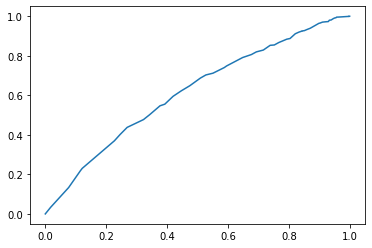

In [31]:
import matplotlib.pyplot as plt
plt.plot(fpr1,tpr1)

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [33]:
from sklearn.metrics import roc_curve 

y_prob1=y_prob[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob1)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


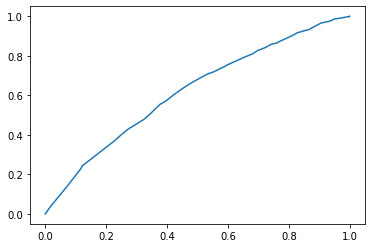

In [34]:
plt.plot(fpr,tpr)

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [35]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_prob1)
print(ROC_AUC)

0.6196226715625339


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

    How is this different, conceptually and quantitatively, from your earlier calculation?
